In [ ]:
# Results for Appendix B (feature correlation)

In [1]:
# make imports work
import sys
sys.path.insert(0, "/Users/JonathanHeitz/git/dementia/src/")

import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import re, glob

In [2]:
# Results based on config /configs/linguistic_features_different_sets/cross_validation/manual/linguistic_features_gpt_5features.yaml
correlation = json.load(open("/Volumes/methlab/Students/Jonathan/results/runs/2024_kw34/20240821_0753_5ff6_feature_sets_cv/20240821_0816_manual_linguistic_features_gpt_5features_slnu/feature_correlation.txt"))

In [3]:
df = pd.DataFrame(correlation)
df

,lit_pronoun_noun_ratio,lit_verb_noun_ratio,lit_subordinate_coordinate_conjunction_ratio,lit_adverb_ratio,lit_noun_ratio,lit_verb_ratio,lit_pronoun_ratio,lit_personal_pronoun_ratio,lit_determiner_ratio,lit_preposition_ratio,...,lit_flesch_kincaid,lit_avg_distance_between_utterances,lit_prop_utterance_dist_below_05,lit_propositional_density,lit_content_density,Semantic Paraphasias,Impoverished Vocabulary,Discourse Impairment,Word-Finding Difficulties (Anomia),Syntactic Simplification
lit_pronoun_noun_ratio,1.000000,0.859883,0.022604,0.483039,-0.820536,0.239760,0.887073,0.742365,-0.606754,-0.330500,...,-0.165676,0.036832,-0.028878,0.185713,-0.530017,0.241016,0.452605,0.417032,0.474119,0.296077
lit_verb_noun_ratio,0.859883,1.000000,0.027345,0.461396,-0.833887,0.606369,0.696421,0.637180,-0.535980,-0.345939,...,-0.081259,0.066034,0.008910,0.329552,-0.392787,0.077277,0.286802,0.266431,0.273096,0.160981
lit_subordinate_coordinate_conjunction_ratio,0.022604,0.027345,1.000000,-0.019497,-0.019047,0.142234,0.096689,0.038108,-0.015482,0.269700,...,0.253994,-0.199466,0.013022,0.187275,0.114983,-0.094871,-0.141415,-0.080131,-0.073945,-0.176886
lit_adverb_ratio,0.483039,0.461396,-0.019497,1.000000,-0.570681,0.047781,0.386237,0.411207,-0.321688,-0.298829,...,-0.143762,0.135035,-0.059131,0.470591,0.004521,0.115349,0.325242,0.272793,0.297309,0.244383
lit_noun_ratio,-0.820536,-0.833887,-0.019047,-0.570681,1.000000,-0.312925,-0.760046,-0.725491,0.512056,0.341067,...,0.105590,-0.044210,0.031484,-0.345581,0.629086,-0.184423,-0.379807,-0.418440,-0.415705,-0.294149
lit_verb_ratio,0.239760,0.606369,0.142234,0.047781,-0.312925,1.000000,0.255627,0.253528,-0.214342,-0.100479,...,0.111812,-0.072871,0.125727,0.341482,0.152312,-0.254807,-0.144562,-0.106413,-0.189835,-0.211797
lit_pronoun_ratio,0.887073,0.696421,0.096689,0.386237,-0.760046,0.255627,1.000000,0.826338,-0.580546,-0.256207,...,-0.113370,-0.045822,-0.002841,0.196054,-0.482698,0.189785,0.359861,0.398334,0.420311,0.236949
lit_personal_pronoun_ratio,0.742365,0.637180,0.038108,0.411207,-0.725491,0.253528,0.826338,1.000000,-0.523406,-0.223076,...,-0.078787,0.074387,-0.059530,0.298298,-0.441841,0.187150,0.326934,0.361555,0.372108,0.265577
lit_determiner_ratio,-0.606754,-0.535980,-0.015482,-0.321688,0.512056,-0.214342,-0.580546,-0.523406,1.000000,0.355862,...,0.271774,-0.229903,0.134843,-0.043337,0.268128,-0.315414,-0.378647,-0.406191,-0.403669,-0.376780
lit_preposition_ratio,-0.330500,-0.345939,0.269700,-0.298829,0.341067,-0.100479,-0.256207,-0.223076,0.355862,1.000000,...,0.561377,-0.277993,0.181711,0.355467,0.175314,-0.309437,-0.389140,-0.334517,-0.303559,-0.372583


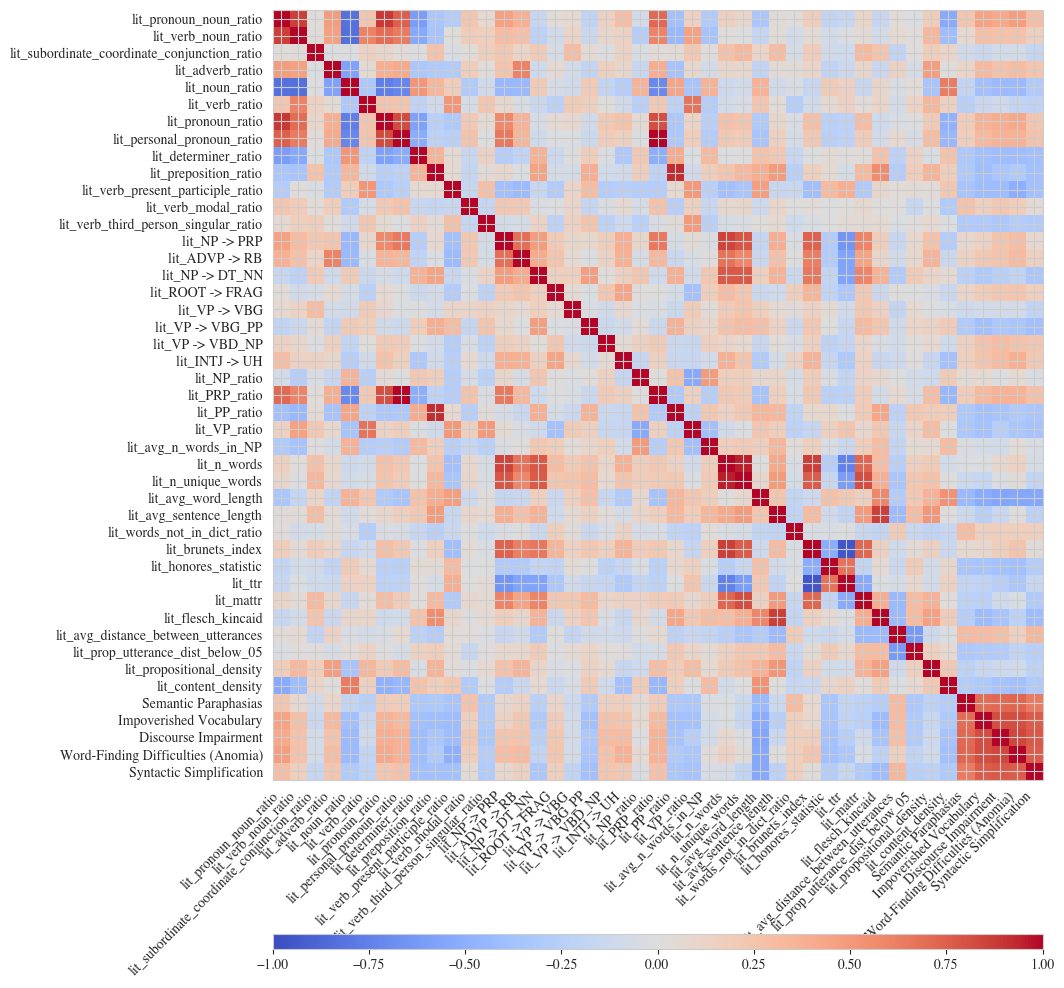

In [4]:
from matplotlib import rc, font_manager



rc('font',**{'family':'serif','serif':['Times']})

fig, ax = plt.subplots(1, 1,figsize=(10,10))
im = ax.imshow(df, 
           cmap="coolwarm", vmin=-1, vmax=1)
ax.set_yticks(range(len(df.index)), df.index)
ax.set_xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
#for (i, j), z in np.ndenumerate(df):
#    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=5)
axins = ax.inset_axes(bounds=(0,-0.22,1,0.02)
                    #width="200%",  
                    #height="2%",
                    #loc='lower left',
                    #borderpad=-10
                   )
#plt.colorbar(orientation='horizontal',fraction=0.01, pad=0.2)
fig.colorbar(im, cax=axins, orientation="horizontal")

In [5]:
col_subset = df[[c for c in df.columns if 'lit_' not in c]]
row_subset = col_subset.loc[[idx for idx in col_subset.index if 'lit_' in idx]]
row_subset['sort'] = row_subset.mean(axis=1).abs()
row_subset = row_subset.sort_values(by="sort", ascending=False)
row_subset = row_subset.drop(columns=['sort'])
row_subset

,Semantic Paraphasias,Impoverished Vocabulary,Discourse Impairment,Word-Finding Difficulties (Anomia),Syntactic Simplification
lit_avg_word_length,-0.424565,-0.518173,-0.551835,-0.543131,-0.544896
lit_verb_present_participle_ratio,-0.346138,-0.406114,-0.398603,-0.498958,-0.367318
lit_pronoun_noun_ratio,0.241016,0.452605,0.417032,0.474119,0.296077
lit_determiner_ratio,-0.315414,-0.378647,-0.406191,-0.403669,-0.376780
lit_VP -> VBG_PP,-0.289068,-0.380079,-0.328119,-0.336542,-0.382708
lit_preposition_ratio,-0.309437,-0.389140,-0.334517,-0.303559,-0.372583
lit_honores_statistic,-0.338562,-0.346351,-0.361829,-0.379199,-0.278919
lit_noun_ratio,-0.184423,-0.379807,-0.418440,-0.415705,-0.294149
lit_PP_ratio,-0.315999,-0.367363,-0.349880,-0.300639,-0.332860
lit_flesch_kincaid,-0.272867,-0.411763,-0.348726,-0.227103,-0.402084


In [6]:
row_subset.abs().max()

Semantic Paraphasias                  0.424565
Impoverished Vocabulary               0.518173
Discourse Impairment                  0.551835
Word-Finding Difficulties (Anomia)    0.543131
Syntactic Simplification              0.544896
dtype: float64

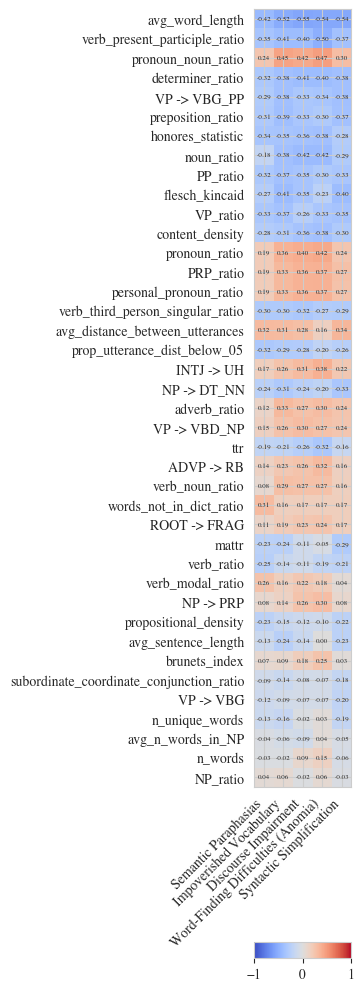

In [7]:
from matplotlib import rc, font_manager
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

rc('font',**{'family':'serif','serif':['Times']})

fig, ax = plt.subplots(1, 1,figsize=(4,10))
im = ax.imshow(row_subset, cmap="coolwarm", vmin=-1, vmax=1)
ax.set_yticks(range(len(row_subset.index)), [re.match(r'lit_(.*)', c).group(1) for c in row_subset.index])
ax.set_xticks(range(len(row_subset.columns)), row_subset.columns, rotation=45, ha='right')
for (i, j), z in np.ndenumerate(row_subset):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=5)
axins = ax.inset_axes(bounds=(0,-0.22,1,0.02)
                    #width="200%",  
                    #height="2%",
                    #loc='lower left',
                    #borderpad=-10
                   )
#plt.colorbar(orientation='horizontal',fraction=0.01, pad=0.2)
fig.colorbar(im, cax=axins, orientation="horizontal")

plt.tight_layout()
plt.subplots_adjust(left=0.7)
plt.savefig("plots/feature_correlation.pdf")